# Walmart Sales (Machine Learning)

In [111]:
#importing required libraries
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

In [112]:
#Reading the data set using pandas
df = pd.read_csv("Walmart_sales.csv")
df.head() #Displaying the 1st 5 datas from the dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [113]:
print("The size of the dataset is: ",df.shape) #Size of the dataset
print(df.describe())

The size of the dataset is:  (6435, 8)
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.62200

In [114]:
df.isnull().sum() # Checking null value

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [115]:
df['Date'] = pd.to_datetime(df['Date']) #Converting the Date column to datetime format

In [116]:
x = df.drop(['Weekly_Sales', 'Date'], axis=1)  # Features excluding 'Weekly_Sales' and 'Date'
x.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
1,1,1,38.51,2.548,211.242170,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106


In [117]:
# Selecting Target variable
y = df['Weekly_Sales']  
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [118]:
# Splitting the data for train and test where the test size is 0.2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=100) 

In [119]:
# Displaying the 1st five datas of the x_train
x_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1069,8,0,73.14,3.786,218.933399,6.297
4213,30,0,75.04,3.899,215.612473,7.931
2471,18,0,43.17,2.961,132.978323,9.331
3232,23,0,64.76,3.684,136.419500,4.584
10,1,0,66.32,2.808,210.488700,7.808


In [120]:
# Displaying the last five datas of the x_train
y_train.tail()

6026     625196.14
79      1525147.09
3927    1253316.30
5955     643125.29
5640     965056.40
Name: Weekly_Sales, dtype: float64

In [121]:
# Chceking the size of the train and test dataset
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (5148, 6)
Shape of x_test:  (1287, 6)
Shape of y_train:  (5148,)
Shape of y_test:  (1287,)


In [122]:
# RandomForest model creation 
rfc = RandomForestRegressor(random_state=100) 
rfc.fit(x_train, y_train ) 

# Predicting the Weekly Sales 
y_pred = rfc.predict(x_test)

In [123]:
# Assuming y_test contains the actual target values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2*100,2))

R-squared Score: 94.62


In [124]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", rmse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 131943.62158506058
Root Mean Squared Error: 131943.62158506058


In [125]:
# Converting the vale of y_pred to 2 decimal format 
formatted_y_pred = ['{:.2f}'.format(value) for value in y_pred]

# Creating a DataFrame to store the target and predicted values
outcome_df = pd.DataFrame({'Actual Weekly Sales': y_test, 'Predicted Weekly Sales': formatted_y_pred})

# Displaying the DataFrame
print(outcome_df)


      Actual Weekly Sales Predicted Weekly Sales
2704           1342123.78             1384758.86
2346            778436.81              783236.68
5200            583835.18              519723.00
3483            600448.69              593709.33
349             391860.04              367412.15
...                   ...                    ...
2058            573374.49              523396.48
1693            991514.21             1001723.20
1505           1266546.73             1325429.38
4175            447139.80              446101.51
3231           1289082.81             1381836.20

[1287 rows x 2 columns]


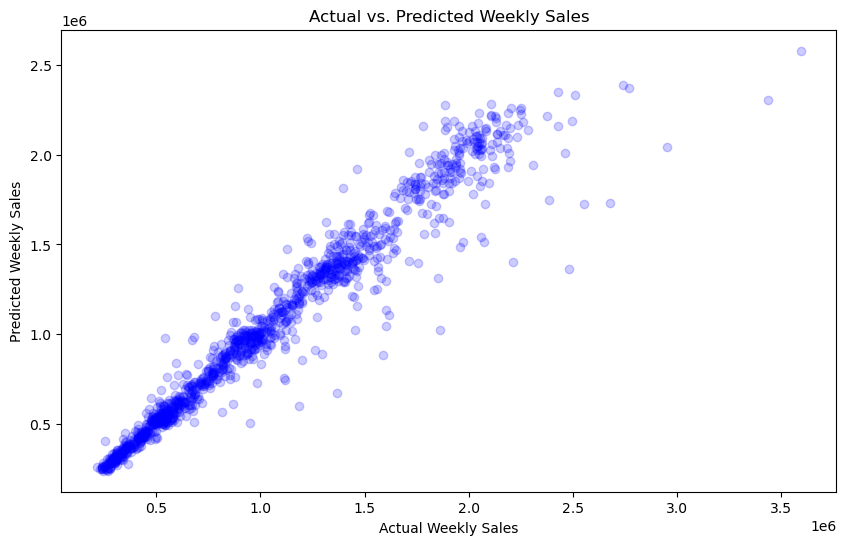

In [126]:
import matplotlib.pyplot as plt

# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.2)
plt.title('Actual vs. Predicted Weekly Sales')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.show()


In [131]:
#Checking the distinct stores 
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

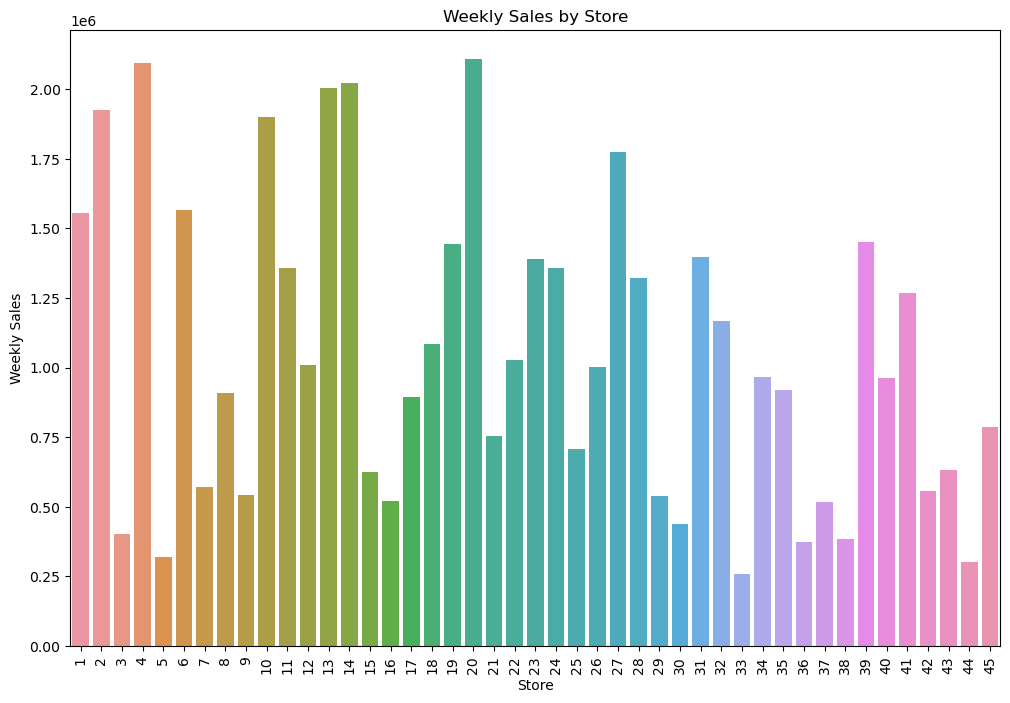

In [128]:
# Plotting the Weekly sales by stores
plt.figure(figsize=(12, 8))
sns.barplot(x='Store', y='Weekly_Sales', data=df, ci=None)
plt.title('Weekly Sales by Store')
plt.xlabel('Store') #Labelling x-axis
plt.ylabel('Weekly Sales') # Labelling y-axis
plt.xticks(rotation=90)
plt.show() # Displaying Plot


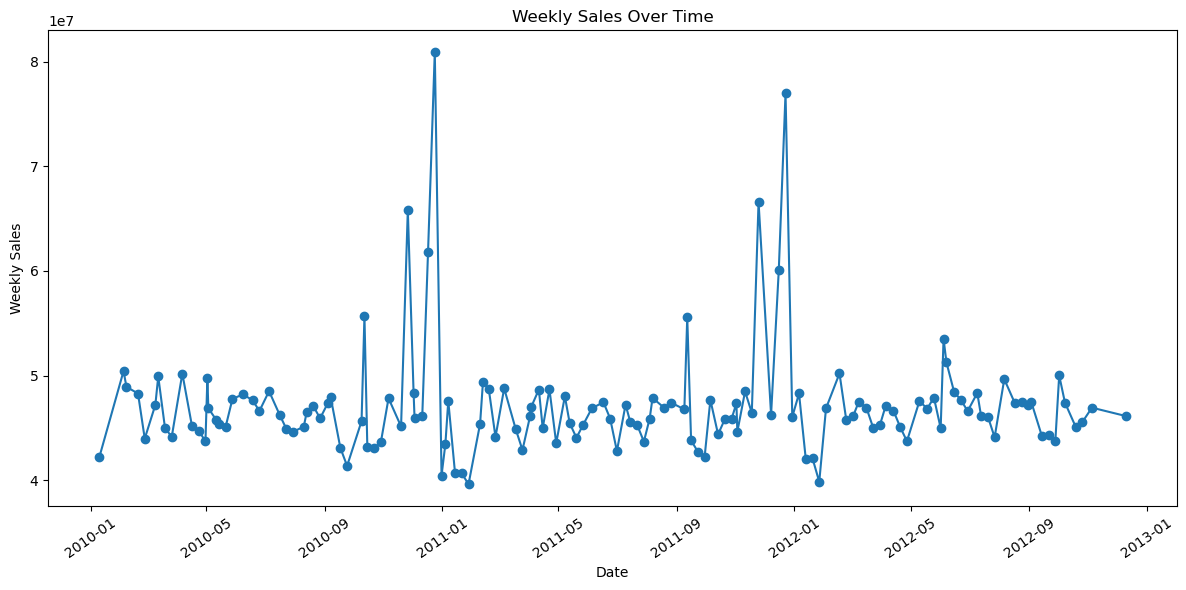

In [129]:
# Group the data by 'Date' and calculate the sum of weekly sales for each date
sales_by_date = df.groupby('Date')['Weekly_Sales'].sum()

# Plotting Weekly sales by date
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()
